,nHeure,population
0,0,32
1,1,47
2,2,65
3,3,92
4,4,132
5,5,190
6,6,275


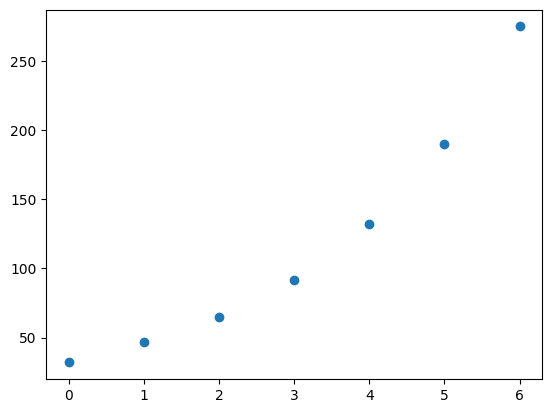

In [5]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np

input_df = pandas.read_csv("Bacterie.csv",sep=";")

plt.plot(input_df["nHeure"],input_df["population"], 'o')

input_df

In [6]:
a_modele_lineaire = input_df.cov()['population']['nHeure']/input_df.cov()['nHeure']['nHeure']
b_modele_lineaire = input_df['population'].mean() - a_modele_lineaire * input_df['nHeure'].mean()

a_modele_lineaire, b_modele_lineaire

(np.float64(38.642857142857146), np.float64(3.071428571428555))

In [7]:
input_df['Modèle linéaire'] = a_modele_lineaire*input_df['nHeure'] + b_modele_lineaire

input_df

,nHeure,population,Modèle linéaire
0,0,32,3.071429
1,1,47,41.714286
2,2,65,80.357143
3,3,92,119.000000
4,4,132,157.642857
5,5,190,196.285714
6,6,275,234.928571


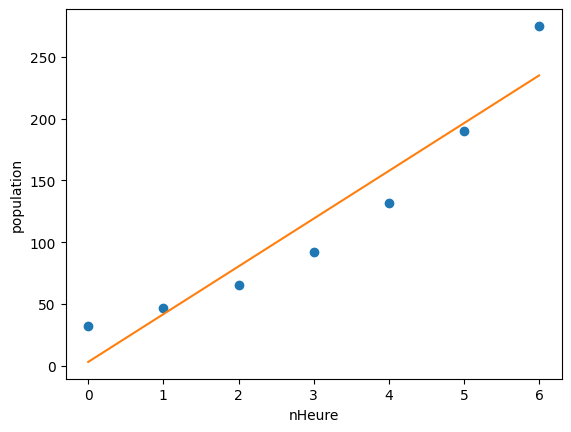

In [8]:
plt.plot(input_df['nHeure'], input_df['population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modèle linéaire'], '-')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.show()

In [ ]:
input_df["Résidus du modèle linéaire"] = input_df.apply(lambda r:r['population']-r["Modèle linéaire"], axis=1)

input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire
0,0,32,3.071429,28.928571
1,1,47,41.714286,5.285714
2,2,65,80.357143,15.357143
3,3,92,119.000000,27.000000
4,4,132,157.642857,25.642857
5,5,190,196.285714,6.285714
6,6,275,234.928571,40.071429


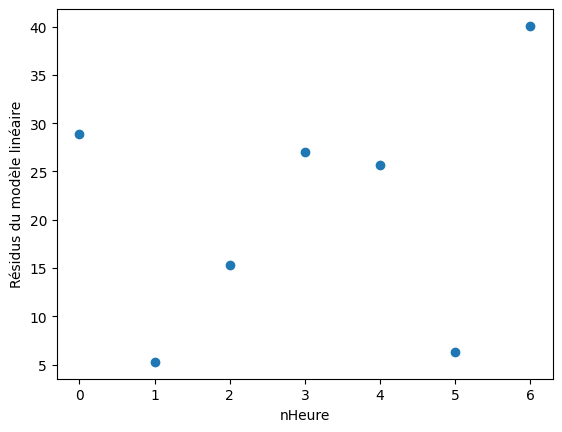

In [10]:
plt.plot(input_df['nHeure'], input_df['Résidus du modèle linéaire'], 'o')
plt.xlabel('nHeure')
plt.ylabel('Résidus du modèle linéaire')
plt.show()

In [12]:
input_df['ln population'] = np.log(input_df['population'])
input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population
0,0,32,3.071429,28.928571,3.465736
1,1,47,41.714286,5.285714,3.850148
2,2,65,80.357143,15.357143,4.174387
3,3,92,119.000000,27.000000,4.521789
4,4,132,157.642857,25.642857,4.882802
5,5,190,196.285714,6.285714,5.247024
6,6,275,234.928571,40.071429,5.616771


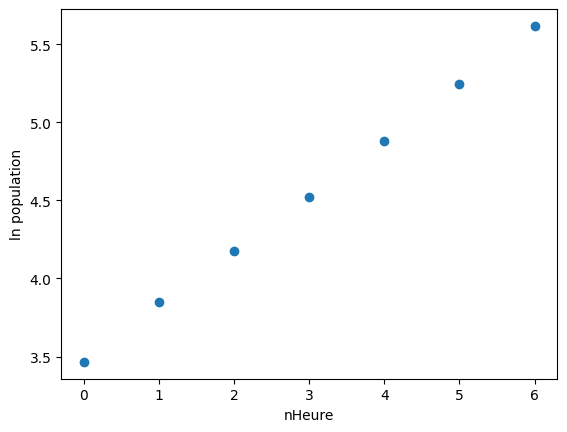

In [13]:
plt.plot(input_df['nHeure'], input_df['ln population'], 'o')
plt.xlabel('nHeure')
plt.ylabel('ln population')
plt.show()

In [14]:
input_df[['nHeure','ln population']].cov()

A = input_df[['nHeure','ln population']].cov()['nHeure']['ln population']/input_df[['nHeure','ln population']].cov()['nHeure']['nHeure']
B = input_df['ln population'].mean() - A * input_df['nHeure'].mean()

A,B

(np.float64(0.35554547064971875), np.float64(3.4703145086033986))

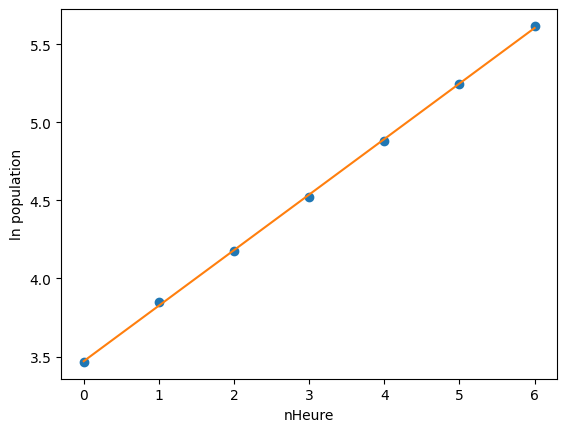

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure
0,0,32,3.071429,28.928571,3.465736,3.470315
1,1,47,41.714286,5.285714,3.850148,3.825860
2,2,65,80.357143,15.357143,4.174387,4.181405
3,3,92,119.000000,27.000000,4.521789,4.536951
4,4,132,157.642857,25.642857,4.882802,4.892496
5,5,190,196.285714,6.285714,5.247024,5.248042
6,6,275,234.928571,40.071429,5.616771,5.603587


In [16]:
input_df['Modele ln population vs nHeure'] = A * input_df['nHeure'] + B

plt.plot(input_df['nHeure'], input_df['ln population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modele ln population vs nHeure'], '-')
plt.xlabel('nHeure')
plt.ylabel('ln population')
plt.show()

input_df

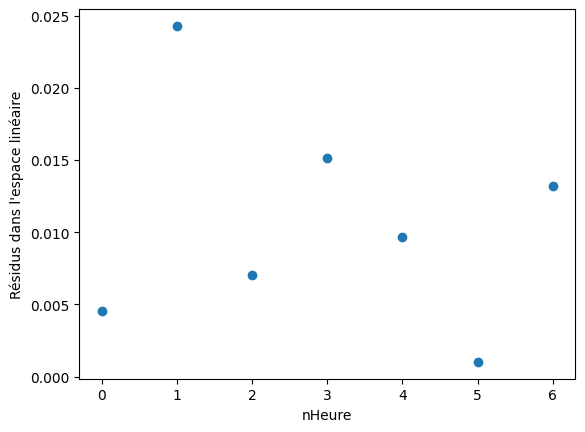

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure,Résidus dans l'espace linéaire
0,0,32,3.071429,28.928571,3.465736,3.470315,0.004579
1,1,47,41.714286,5.285714,3.850148,3.825860,0.024288
2,2,65,80.357143,15.357143,4.174387,4.181405,0.007018
3,3,92,119.000000,27.000000,4.521789,4.536951,0.015162
4,4,132,157.642857,25.642857,4.882802,4.892496,0.009694
5,5,190,196.285714,6.285714,5.247024,5.248042,0.001018
6,6,275,234.928571,40.071429,5.616771,5.603587,0.013184


In [17]:
input_df["Résidus dans l'espace linéaire"] = input_df.apply(lambda r:np.abs(r['ln population']-r['Modele ln population vs nHeure']), axis=1)

plt.plot(input_df['nHeure'], input_df["Résidus dans l'espace linéaire"], 'o')
plt.xlabel('nHeure')
plt.ylabel("Résidus dans l'espace linéaire")
plt.show()

input_df

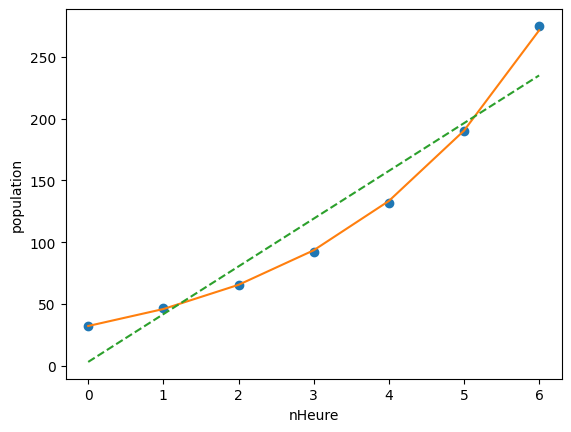

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure,Résidus dans l'espace linéaire,Modele population vs nHeure,Résidus dans l'espace initial (non linéaire)
0,0,32,3.071429,28.928571,3.465736,3.470315,0.004579,32.146851,0.146851
1,1,47,41.714286,5.285714,3.850148,3.825860,0.024288,45.872233,1.127767
2,2,65,80.357143,15.357143,4.174387,4.181405,0.007018,65.457786,0.457786
3,3,92,119.000000,27.000000,4.521789,4.536951,0.015162,93.405565,1.405565
4,4,132,157.642857,25.642857,4.882802,4.892496,0.009694,133.285893,1.285893
5,5,190,196.285714,6.285714,5.247024,5.248042,0.001018,190.193478,0.193478
6,6,275,234.928571,40.071429,5.616771,5.603587,0.013184,271.398259,3.601741


In [24]:
input_df['Modele population vs nHeure'] = np.exp(input_df['Modele ln population vs nHeure'])

plt.plot(input_df['nHeure'], input_df['population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modele population vs nHeure'], '-')
plt.plot(input_df['nHeure'], input_df['Modèle linéaire'], '--')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.show()

input_df

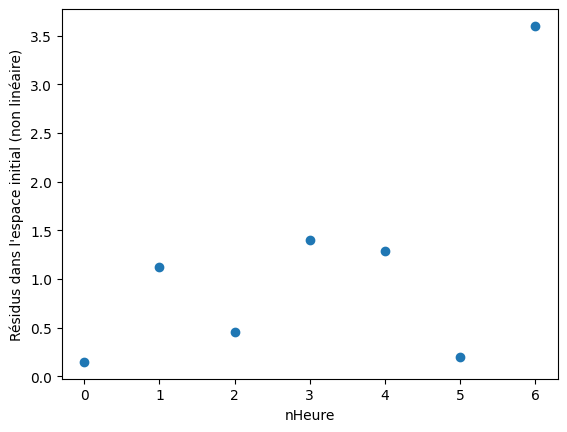

In [20]:
input_df["Résidus dans l'espace initial (non linéaire)"] = input_df.apply(lambda r:np.abs(r['population']-r['Modele population vs nHeure']), axis=1)

plt.plot(input_df['nHeure'], input_df["Résidus dans l'espace initial (non linéaire)"], 'o')
plt.xlabel('nHeure')
plt.ylabel("Résidus dans l'espace initial (non linéaire)")
plt.show()